# Plot stats of dv/v model parameters with MCMC.

2023.4.4 Kurama Okubo

Plot MCMC stats of model paramters and AIC/BIC.

2023.4.18 update to get fixed paramters.

In [1]:
# %load_ext autoreload
# %autoreload 2

import datetime
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
%matplotlib inline
from IPython.display import display, Math

import numpy as np
import pandas as pd
import h5py
import pickle

import shutil
from tqdm import tqdm
import glob

import matplotlib as mpl

# import mcmc functions
from scattermatrix import *
from MCMC_func import *

import seaborn as sns

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [2]:
dvvmethod = "mwcs"
inputdatadir = "../data_stats"
freqband = "0.9-1.2"

residu_absmean_thresh = 0.05
residu_var_thresh = 0.002

output_imgdir = "../figure_stats"


In [3]:
# read table

In [4]:
df_all = pd.DataFrame()
df_all = pd.concat([df_all, pd.read_csv(inputdatadir+"/MCMC_modelparam_all_{}_{}_{}.csv".format("stretching", freqband, "base"), index_col=0)])
df_all = pd.concat([df_all, pd.read_csv(inputdatadir+"/MCMC_modelparam_all_{}_{}_{}.csv".format("stretching", freqband, "wlin"), index_col=0)])
df_all = pd.concat([df_all, pd.read_csv(inputdatadir+"/MCMC_modelparam_all_{}_{}_{}.csv".format("mwcs", freqband, "base"), index_col=0)])
df_all = pd.concat([df_all, pd.read_csv(inputdatadir+"/MCMC_modelparam_all_{}_{}_{}.csv".format("mwcs", freqband, "wlin"), index_col=0)])

In [5]:
df_all_residuthresh = df_all[np.round(df_all.residu_var, 4) <= residu_var_thresh] # Update: round the small decimal error in the computation of  residual

In [6]:
df_all_residuthresh

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,log10tmax1,S2,log10tmin2,log10tmax2,b_{lin},logf,AIC,BIC,residu_absmean,residu_var
BP.CCRB-BP.CCRB,stretching,base,0.9-1.2,-0.012194,0.002004,0.000353,0.001762,14.930649,0.024276,6.137137,7.761059,0.069192,7.375354,8.197259,NaN,-3.830436,-8242.182959,-8191.679879,0.020347,0.000656
BP.CCRB-BP.EADB,stretching,base,0.9-1.2,0.005398,0.001289,0.000996,0.000641,6.476215,0.029047,6.756409,8.360127,0.262924,7.954741,8.198090,NaN,-4.053383,-8045.625436,-7995.122355,0.021842,0.000992
BP.CCRB-BP.FROB,stretching,base,0.9-1.2,0.018683,-0.006876,0.586328,-0.000408,127.568468,0.032994,7.051507,8.400548,0.099459,7.951338,8.388129,NaN,-4.905118,-8203.813100,-8153.310019,0.020859,0.000918
BP.CCRB-BP.LCCB,stretching,base,0.9-1.2,0.011040,0.000879,0.000197,0.000168,52.956732,0.013151,7.844258,8.518336,0.038420,7.056437,8.662362,NaN,-3.896197,-8178.537156,-8128.034076,0.021746,0.000768
BP.CCRB-BP.MMNB,stretching,base,0.9-1.2,0.004643,0.000756,0.000477,0.000598,106.811837,0.087795,7.617444,8.015034,0.186959,7.958342,8.246082,NaN,-3.819138,-8086.185583,-8035.682502,0.023628,0.000953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BP.SCYB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.017772,-0.003752,0.034715,0.000873,4.252007,0.003016,1.773538,10.527479,0.025777,6.809682,8.414161,0.000006,-3.757425,-8351.796698,-8297.085027,0.016196,0.000517
BP.SCYB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.011344,-0.004829,0.037395,0.000115,23.066777,0.009103,6.190866,9.016184,0.022671,6.782552,8.571380,0.000005,-3.594617,-8176.332552,-8121.620881,0.017022,0.000730
BP.SMNB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.002106,0.003294,0.010339,0.001406,3.381138,0.006500,6.509299,8.760273,0.045765,5.813809,7.753246,0.000003,-3.216148,-7794.902468,-7740.190797,0.029762,0.001555
BP.SMNB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.034268,-0.005470,0.037543,-0.001444,120.482905,0.002817,4.459430,11.552669,0.026963,6.197128,7.996184,0.000011,-3.379589,-7939.651561,-7884.939891,0.023476,0.001175


In [7]:
# df_all_residuthresh.to_csv(inputdatadir+"/test135.csv")

In [8]:
cpalette=np.array(sns.color_palette("Set1"))[1:3]

In [9]:
df_wlin_residuthresh = df_all_residuthresh[df_all_residuthresh["modelcase"]=="wlin"]
df_wlin_residuthresh

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,log10tmax1,S2,log10tmin2,log10tmax2,b_{lin},logf,AIC,BIC,residu_absmean,residu_var
BP.CCRB-BP.CCRB,stretching,wlin,0.9-1.2,-0.049034,0.003271,0.207531,0.001726,0.861371,0.004429,7.948685,11.991757,0.346551,7.447058,7.564994,0.000015,-3.989497,-8371.967718,-8317.256048,0.017503,0.000503
BP.CCRB-BP.EADB,stretching,wlin,0.9-1.2,-0.041651,-0.004325,0.014153,-0.000356,67.862067,0.017832,6.413260,8.217462,0.349953,7.947088,8.119590,0.000010,-4.377565,-8145.278740,-8090.567069,0.019910,0.000810
BP.CCRB-BP.FROB,stretching,wlin,0.9-1.2,-0.000698,-0.006347,0.074263,-0.000359,129.907414,0.009618,1.928844,10.084232,0.030375,6.844477,8.547114,0.000008,-9.392913,-8260.965974,-8206.254304,0.019324,0.000816
BP.CCRB-BP.LCCB,stretching,wlin,0.9-1.2,-0.031083,-0.001982,0.000758,-0.000117,74.689048,0.001534,6.785370,11.530545,0.011451,6.250349,11.089252,0.000021,-4.341097,-8344.429259,-8289.717589,0.018339,0.000547
BP.CCRB-BP.MMNB,stretching,wlin,0.9-1.2,-0.044718,-0.002589,0.002125,-0.000426,19.061273,0.020229,7.086897,8.421251,0.141314,7.849953,8.187710,0.000011,-3.969836,-8207.888718,-8153.177048,0.020314,0.000744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BP.SCYB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.017772,-0.003752,0.034715,0.000873,4.252007,0.003016,1.773538,10.527479,0.025777,6.809682,8.414161,0.000006,-3.757425,-8351.796698,-8297.085027,0.016196,0.000517
BP.SCYB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.011344,-0.004829,0.037395,0.000115,23.066777,0.009103,6.190866,9.016184,0.022671,6.782552,8.571380,0.000005,-3.594617,-8176.332552,-8121.620881,0.017022,0.000730
BP.SMNB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.002106,0.003294,0.010339,0.001406,3.381138,0.006500,6.509299,8.760273,0.045765,5.813809,7.753246,0.000003,-3.216148,-7794.902468,-7740.190797,0.029762,0.001555
BP.SMNB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.034268,-0.005470,0.037543,-0.001444,120.482905,0.002817,4.459430,11.552669,0.026963,6.197128,7.996184,0.000011,-3.379589,-7939.651561,-7884.939891,0.023476,0.001175


In [10]:
df_wlin_residuthresh["tmin1"] = df_wlin_residuthresh["log10tmin1"].apply(lambda x: 10**x/86400/365)
df_wlin_residuthresh["tmin2"] = df_wlin_residuthresh["log10tmin2"].apply(lambda x: 10**x/86400/365)
df_wlin_residuthresh["tmax1"] = df_wlin_residuthresh["log10tmax1"].apply(lambda x: 10**x/86400/365)
df_wlin_residuthresh["tmax2"] = df_wlin_residuthresh["log10tmax2"].apply(lambda x: 10**x/86400/365)
df_wlin_residuthresh["blin_1overyear"] = df_wlin_residuthresh["b_{lin}"].apply(lambda x: x*365)


/var/folders/6n/nsqc1sbn1kn5ccc7y51plgz00000gn/T/ipykernel_12161/1913955929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wlin_residuthresh["tmin1"] = df_wlin_residuthresh["log10tmin1"].apply(lambda x: 10**x/86400/365)
/var/folders/6n/nsqc1sbn1kn5ccc7y51plgz00000gn/T/ipykernel_12161/1913955929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wlin_residuthresh["tmin2"] = df_wlin_residuthresh["log10tmin2"].apply(lambda x: 10**x/86400/365)
/var/folders/6n/nsqc1sbn1kn5ccc7y51plgz00000gn/T/ipykern

In [11]:
df_wlin_residuthresh

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,...,logf,AIC,BIC,residu_absmean,residu_var,tmin1,tmin2,tmax1,tmax2,blin_1overyear
BP.CCRB-BP.CCRB,stretching,wlin,0.9-1.2,-0.049034,0.003271,0.207531,0.001726,0.861371,0.004429,7.948685,...,-3.989497,-8371.967718,-8317.256048,0.017503,0.000503,2.817591,0.887670,31113.617423,1.164629,0.005386
BP.CCRB-BP.EADB,stretching,wlin,0.9-1.2,-0.041651,-0.004325,0.014153,-0.000356,67.862067,0.017832,6.413260,...,-4.377565,-8145.278740,-8090.567069,0.019910,0.000810,0.082121,2.807255,5.231847,4.176224,0.003556
BP.CCRB-BP.FROB,stretching,wlin,0.9-1.2,-0.000698,-0.006347,0.074263,-0.000359,129.907414,0.009618,1.928844,...,-9.392913,-8260.965974,-8206.254304,0.019324,0.000816,0.000003,0.221651,384.968782,11.176530,0.002980
BP.CCRB-BP.LCCB,stretching,wlin,0.9-1.2,-0.031083,-0.001982,0.000758,-0.000117,74.689048,0.001534,6.785370,...,-4.341097,-8344.429259,-8289.717589,0.018339,0.000547,0.193448,0.056434,10758.172183,3894.443093,0.007799
BP.CCRB-BP.MMNB,stretching,wlin,0.9-1.2,-0.044718,-0.002589,0.002125,-0.000426,19.061273,0.020229,7.086897,...,-3.969836,-8207.888718,-8153.177048,0.020314,0.000744,0.387338,2.244639,8.364589,4.885434,0.004072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BP.SCYB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.017772,-0.003752,0.034715,0.000873,4.252007,0.003016,1.773538,...,-3.757425,-8351.796698,-8297.085027,0.016196,0.000517,0.000002,0.204586,1068.248380,8.229133,0.002344
BP.SCYB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.011344,-0.004829,0.037395,0.000115,23.066777,0.009103,6.190866,...,-3.594617,-8176.332552,-8121.620881,0.017022,0.000730,0.049211,0.192197,32.913744,11.818805,0.001729
BP.SMNB-BP.SMNB,mwcs,wlin,0.9-1.2,-0.002106,0.003294,0.010339,0.001406,3.381138,0.006500,6.509299,...,-3.216148,-7794.902468,-7740.190797,0.029762,0.001555,0.102445,0.020654,18.258564,1.796552,0.000977
BP.SMNB-BP.VCAB,mwcs,wlin,0.9-1.2,-0.034268,-0.005470,0.037543,-0.001444,120.482905,0.002817,4.459430,...,-3.379589,-7939.651561,-7884.939891,0.023476,0.001175,0.000913,0.049925,11320.417111,3.143240,0.004061


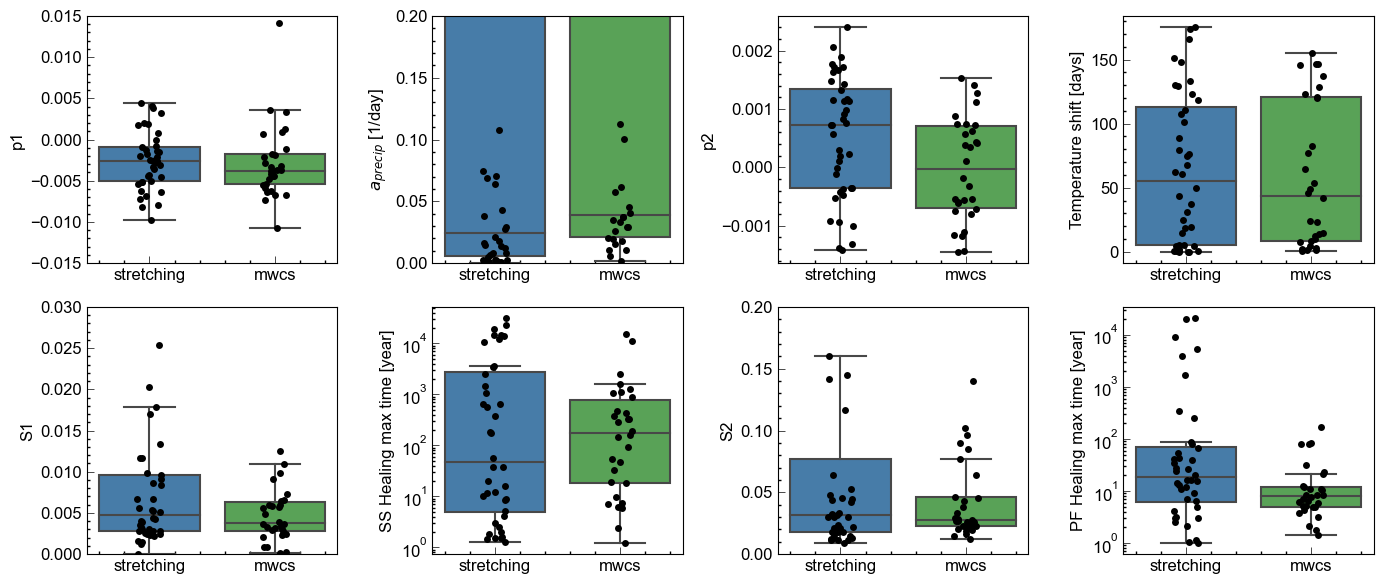

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(14, 6))

np.random.seed(20230405)

# p1
key="p1"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[0, 0])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[0, 0])
axs[0, 0].set_ylabel("p1")
axs[0, 0].set_ylim([-0.015, 0.015])


#a_precip
key="a_{precip}"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[0, 1])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[0, 1])
axs[0, 1].set_ylabel("$a_{precip}$ [1/day]")
axs[0, 1].set_ylim([0.0, 0.2])
# axs[0, 1].set_yscale('log')


# p2
key="p2"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[0, 2])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[0, 2])
axs[0, 2].set_ylabel("p2")
# axs[0, 2].set_ylim([-0.015, 0.03])

# t_shift
key="t_{shiftdays}"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[0, 3])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[0, 3])
axs[0, 3].set_ylabel("Temperature shift [days]")
# axs[0, 3].set_ylim([-0.015, 0.03])


# S1
key="S1"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[1, 0])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[1, 0])
axs[1, 0].set_ylabel("S1")
axs[1, 0].set_ylim([0, 0.03])


# tmax1
key="tmax1"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[1, 1])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[1, 1])
axs[1, 1].set_ylabel("SS Healing max time [year]")
axs[1, 1].set_yscale('log')

# axs[1, 0].set_ylim([0, 0.05])


# S2
key="S2"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[1, 2])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[1, 2])
axs[1, 2].set_ylabel("S2")
axs[1, 2].set_ylim([0, 0.2])


# tmax2
key="tmax2"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[1, 3])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[1, 3])
axs[1, 3].set_ylabel("PF Healing max time [year]")
axs[1, 3].set_yscale('log')


plt.setp(axs, xlabel=None)

# axs.set(axs, xlabel=None)

fig.tight_layout()

foname = (output_imgdir+"/MCMC_modelparam_boxplot_{}_{}.png".format(freqband, "wlin"))
plt.savefig(foname, dpi=300)

In [13]:
df_wlin_residuthresh[df_wlin_residuthresh.S1 > 0.15]

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,...,logf,AIC,BIC,residu_absmean,residu_var,tmin1,tmin2,tmax1,tmax2,blin_1overyear
BP.GHIB-BP.GHIB,stretching,wlin,0.9-1.2,-0.155486,-0.002146,0.007753,0.001323,18.236178,0.198971,7.739441,...,-4.298384,-7918.05316,-7863.341489,0.026429,0.00141,1.740342,2.576633,3.036667,3.123299,0.012169


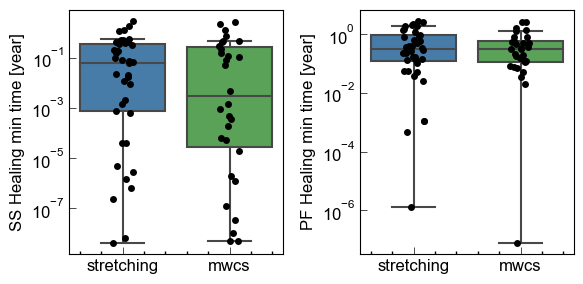

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

np.random.seed(20230405)

# tmax1
key="tmin1"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[0])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[0])
axs[0].set_ylabel("SS Healing min time [year]")
axs[0].set_yscale('log')

# tmax2
key="tmin2"
sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=axs[1])
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=axs[1])
axs[1].set_ylabel("PF Healing min time [year]")
axs[1].set_yscale('log')

plt.setp(axs, xlabel=None)

# axs.set(axs, xlabel=None)

fig.tight_layout()

foname = (output_imgdir+"/MCMC_tmin_boxplot_{}_{}.png".format(freqband, "wlin"))
plt.savefig(foname, dpi=300)

## Plot blin

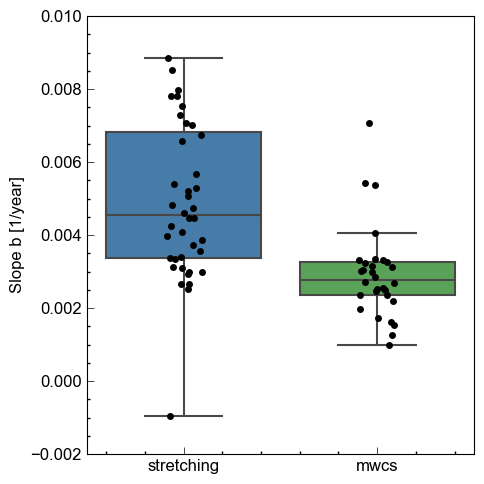

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

key = "blin_1overyear" #"b_{lin}"

sns.boxplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, showfliers=False, palette=cpalette, ax=ax )
sns.stripplot(x="dvvmethod", y=key, data=df_wlin_residuthresh, jitter=True, color="k", ax=ax )

ax.set_ylabel("Slope b [1/year]")
ax.set_ylim([-0.002, 0.01])

plt.setp(ax, xlabel=None)
fig.tight_layout()

foname = (output_imgdir+"/MCMC_modelparam_boxplot_blin_{}_{}.png".format(freqband, "wlin"))
plt.savefig(foname, dpi=300)

# Compute median of model paramters

In [16]:
df_wlin_residuthresh['b_{lin}']

BP.CCRB-BP.CCRB    0.000015
BP.CCRB-BP.EADB    0.000010
BP.CCRB-BP.FROB    0.000008
BP.CCRB-BP.LCCB    0.000021
BP.CCRB-BP.MMNB    0.000011
                     ...   
BP.SCYB-BP.SMNB    0.000006
BP.SCYB-BP.VCAB    0.000005
BP.SMNB-BP.SMNB    0.000003
BP.SMNB-BP.VCAB    0.000011
BP.VCAB-BP.VCAB    0.000009
Name: b_{lin}, Length: 70, dtype: float64

In [17]:
df_wlin_residuthresh.head()

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,...,logf,AIC,BIC,residu_absmean,residu_var,tmin1,tmin2,tmax1,tmax2,blin_1overyear
BP.CCRB-BP.CCRB,stretching,wlin,0.9-1.2,-0.049034,0.003271,0.207531,0.001726,0.861371,0.004429,7.948685,...,-3.989497,-8371.967718,-8317.256048,0.017503,0.000503,2.817591,0.887670,31113.617423,1.164629,0.005386
BP.CCRB-BP.EADB,stretching,wlin,0.9-1.2,-0.041651,-0.004325,0.014153,-0.000356,67.862067,0.017832,6.413260,...,-4.377565,-8145.278740,-8090.567069,0.019910,0.000810,0.082121,2.807255,5.231847,4.176224,0.003556
BP.CCRB-BP.FROB,stretching,wlin,0.9-1.2,-0.000698,-0.006347,0.074263,-0.000359,129.907414,0.009618,1.928844,...,-9.392913,-8260.965974,-8206.254304,0.019324,0.000816,0.000003,0.221651,384.968782,11.176530,0.002980
BP.CCRB-BP.LCCB,stretching,wlin,0.9-1.2,-0.031083,-0.001982,0.000758,-0.000117,74.689048,0.001534,6.785370,...,-4.341097,-8344.429259,-8289.717589,0.018339,0.000547,0.193448,0.056434,10758.172183,3894.443093,0.007799
BP.CCRB-BP.MMNB,stretching,wlin,0.9-1.2,-0.044718,-0.002589,0.002125,-0.000426,19.061273,0.020229,7.086897,...,-3.969836,-8207.888718,-8153.177048,0.020314,0.000744,0.387338,2.244639,8.364589,4.885434,0.004072


In [18]:
df_wlin_residuthresh_stretching = df_wlin_residuthresh[df_wlin_residuthresh["dvvmethod"] == "stretching"]
df_wlin_residuthresh_mwcs = df_wlin_residuthresh[df_wlin_residuthresh["dvvmethod"] == "mwcs"]

In [19]:
df_wlin_residuthresh_stretching.head()

,dvvmethod,modelcase,freqband,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,...,logf,AIC,BIC,residu_absmean,residu_var,tmin1,tmin2,tmax1,tmax2,blin_1overyear
BP.CCRB-BP.CCRB,stretching,wlin,0.9-1.2,-0.049034,0.003271,0.207531,0.001726,0.861371,0.004429,7.948685,...,-3.989497,-8371.967718,-8317.256048,0.017503,0.000503,2.817591,0.887670,31113.617423,1.164629,0.005386
BP.CCRB-BP.EADB,stretching,wlin,0.9-1.2,-0.041651,-0.004325,0.014153,-0.000356,67.862067,0.017832,6.413260,...,-4.377565,-8145.278740,-8090.567069,0.019910,0.000810,0.082121,2.807255,5.231847,4.176224,0.003556
BP.CCRB-BP.FROB,stretching,wlin,0.9-1.2,-0.000698,-0.006347,0.074263,-0.000359,129.907414,0.009618,1.928844,...,-9.392913,-8260.965974,-8206.254304,0.019324,0.000816,0.000003,0.221651,384.968782,11.176530,0.002980
BP.CCRB-BP.LCCB,stretching,wlin,0.9-1.2,-0.031083,-0.001982,0.000758,-0.000117,74.689048,0.001534,6.785370,...,-4.341097,-8344.429259,-8289.717589,0.018339,0.000547,0.193448,0.056434,10758.172183,3894.443093,0.007799
BP.CCRB-BP.MMNB,stretching,wlin,0.9-1.2,-0.044718,-0.002589,0.002125,-0.000426,19.061273,0.020229,7.086897,...,-3.969836,-8207.888718,-8153.177048,0.020314,0.000744,0.387338,2.244639,8.364589,4.885434,0.004072


In [20]:
medians_stretching = df_wlin_residuthresh_stretching.median(numeric_only=True).values
medians_mwcs = df_wlin_residuthresh_mwcs.median(numeric_only=True).values


In [21]:
len(medians_mwcs)

22

In [22]:
df_wlin_residuthresh_mwcs.keys()

Index(['dvvmethod', 'modelcase', 'freqband', 'a0', 'p1', 'a_{precip}', 'p2',
       't_{shiftdays}', 'S1', 'log10tmin1', 'log10tmax1', 'S2', 'log10tmin2',
       'log10tmax2', 'b_{lin}', 'logf', 'AIC', 'BIC', 'residu_absmean',
       'residu_var', 'tmin1', 'tmin2', 'tmax1', 'tmax2', 'blin_1overyear'],
      dtype='object')

In [23]:
for i, key in enumerate(df_wlin_residuthresh_mwcs[['a0', 'p1', 'a_{precip}', 'p2','t_{shiftdays}', 'S1', 'log10tmin1', 'log10tmax1', 'S2', 'log10tmin2',
       'log10tmax2', 'b_{lin}', 'logf', 'AIC', 'BIC', 'residu_absmean','residu_var', 'tmin1', 'tmin2', 'tmax1', 'tmax2', 'blin_1overyear']].keys()):
    
    if key in ['dvvmethod', 'modelcase', 'freqband']:
        continue;

    print(f"{key}, stretching:{medians_stretching[i]} mwcs:{medians_mwcs[i]}")
    

a0, stretching:-0.03261045028455705 mwcs:-0.025633145239807448
p1, stretching:-0.0025910627460241998 mwcs:-0.0037680065346317503
a_{precip}, stretching:0.0242611471128751 mwcs:0.038884360089418896
p2, stretching:0.00072318919670095 mwcs:-3.5136217241950005e-05
t_{shiftdays}, stretching:55.2688890943079 mwcs:43.92028405001707
S1, stretching:0.00477770944128 mwcs:0.0037967753601732997
log10tmin1, stretching:6.2927181557085845 mwcs:4.902713667811209
log10tmax1, stretching:9.165732110068184 mwcs:9.74371652223777
S2, stretching:0.0314511531026462 mwcs:0.0274050668775567
log10tmin2, stretching:6.9963900156196335 mwcs:6.992684527304036
log10tmax2, stretching:8.763205859740792 mwcs:8.394682722319327
b_{lin}, stretching:1.2426130854022275e-05 mwcs:7.610336204988592e-06
logf, stretching:-4.359330696995799 mwcs:-3.5895379248241177
AIC, stretching:-8163.946458912106 mwcs:-8154.952583148492
BIC, stretching:-8109.23478857285 mwcs:-8100.240912809236
residu_absmean, stretching:0.0199683273896687 mwcs:

**Here we obtained the fixed median value for the next computation of MCMC inversion**

In [24]:
df_wlin_residuthresh[['a0', 'p1', 'a_{precip}', 'p2','t_{shiftdays}', 'S1', 'log10tmin1', 'log10tmax1', 'S2', 'log10tmin2',
       'log10tmax2', 'b_{lin}', 'logf', 'AIC', 'BIC', 'residu_absmean','residu_var', 'tmin1', 'tmin2', 'tmax1', 'tmax2', 'blin_1overyear']]

,a0,p1,a_{precip},p2,t_{shiftdays},S1,log10tmin1,log10tmax1,S2,log10tmin2,...,logf,AIC,BIC,residu_absmean,residu_var,tmin1,tmin2,tmax1,tmax2,blin_1overyear
BP.CCRB-BP.CCRB,-0.049034,0.003271,0.207531,0.001726,0.861371,0.004429,7.948685,11.991757,0.346551,7.447058,...,-3.989497,-8371.967718,-8317.256048,0.017503,0.000503,2.817591,0.887670,31113.617423,1.164629,0.005386
BP.CCRB-BP.EADB,-0.041651,-0.004325,0.014153,-0.000356,67.862067,0.017832,6.413260,8.217462,0.349953,7.947088,...,-4.377565,-8145.278740,-8090.567069,0.019910,0.000810,0.082121,2.807255,5.231847,4.176224,0.003556
BP.CCRB-BP.FROB,-0.000698,-0.006347,0.074263,-0.000359,129.907414,0.009618,1.928844,10.084232,0.030375,6.844477,...,-9.392913,-8260.965974,-8206.254304,0.019324,0.000816,0.000003,0.221651,384.968782,11.176530,0.002980
BP.CCRB-BP.LCCB,-0.031083,-0.001982,0.000758,-0.000117,74.689048,0.001534,6.785370,11.530545,0.011451,6.250349,...,-4.341097,-8344.429259,-8289.717589,0.018339,0.000547,0.193448,0.056434,10758.172183,3894.443093,0.007799
BP.CCRB-BP.MMNB,-0.044718,-0.002589,0.002125,-0.000426,19.061273,0.020229,7.086897,8.421251,0.141314,7.849953,...,-3.969836,-8207.888718,-8153.177048,0.020314,0.000744,0.387338,2.244639,8.364589,4.885434,0.004072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BP.SCYB-BP.SMNB,-0.017772,-0.003752,0.034715,0.000873,4.252007,0.003016,1.773538,10.527479,0.025777,6.809682,...,-3.757425,-8351.796698,-8297.085027,0.016196,0.000517,0.000002,0.204586,1068.248380,8.229133,0.002344
BP.SCYB-BP.VCAB,-0.011344,-0.004829,0.037395,0.000115,23.066777,0.009103,6.190866,9.016184,0.022671,6.782552,...,-3.594617,-8176.332552,-8121.620881,0.017022,0.000730,0.049211,0.192197,32.913744,11.818805,0.001729
BP.SMNB-BP.SMNB,-0.002106,0.003294,0.010339,0.001406,3.381138,0.006500,6.509299,8.760273,0.045765,5.813809,...,-3.216148,-7794.902468,-7740.190797,0.029762,0.001555,0.102445,0.020654,18.258564,1.796552,0.000977
BP.SMNB-BP.VCAB,-0.034268,-0.005470,0.037543,-0.001444,120.482905,0.002817,4.459430,11.552669,0.026963,6.197128,...,-3.379589,-7939.651561,-7884.939891,0.023476,0.001175,0.000913,0.049925,11320.417111,3.143240,0.004061
